## Estadística Aplicada

Sesión 8 - 8 septiembre

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [1]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#librerias especializadas
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [4]:
#importar datos
datos_km = pd.read_excel('ejercicio_km.xlsx')
datos_km.head()

,individuo,tiempo_sup,evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [6]:
km1 = KaplanMeierFitter().fit(datos_km['tiempo_sup'], datos_km['evento'])

In [8]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [9]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


In [10]:
km1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
6.0,0.619718,0.951552
7.0,0.563147,0.922809
9.0,0.563147,0.922809
10.0,0.503200,0.889362
11.0,0.503200,0.889362
13.0,0.431610,0.849066
16.0,0.367511,0.804912
17.0,0.367511,0.804912
19.0,0.367511,0.804912


([<matplotlib.axis.YTick at 0x242f5ace490>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

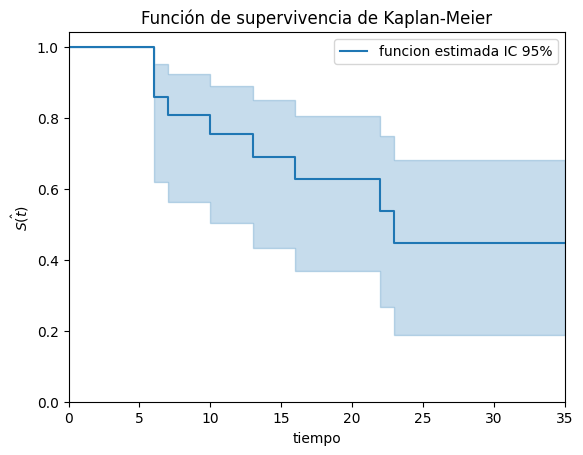

In [15]:
km1.plot_survival_function(label = 'funcion estimada IC 95%')
plt.xlim(0,35)
plt.title('Función de supervivencia de Kaplan-Meier')
plt.xlabel('tiempo')
plt.ylabel('$\hat{S(t)}$')
plt.yticks([0,0.2,0.4,0.6,0.8,1])

In [17]:
relacion= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


Esta base de datos contiene al infromación de 42 individuos.  La variable "t" contiene el tiempo de supervivencia de la relación del individuo.

Evento relación se termine y se encuentra en la variable estado donde 1 relación terminó y 0 es censura.  La variable tratamiento toma valores de 0 y 1, donde 0 es una persona no detallista en la relación y 1 es una persona detallista en la relación.  El tiempo está medido en semanas, y detallista es la persona que da un regalo por semana a su pareja (paleta, helado, peluche, etc.)

In [18]:
km_all = KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

([<matplotlib.axis.YTick at 0x242f6350250>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

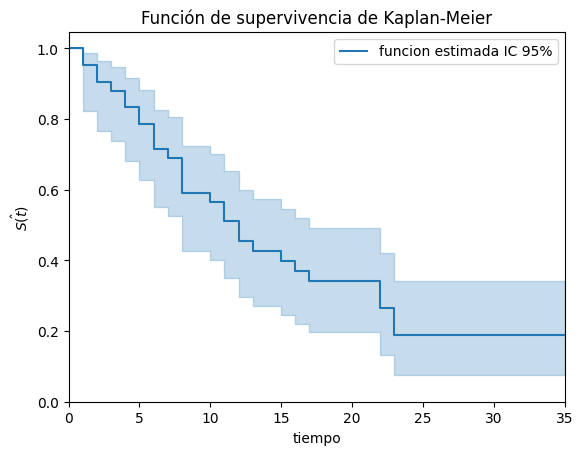

In [20]:
km_all.plot_survival_function(label = 'funcion estimada IC 95%')
plt.xlim(0,35)
plt.title('Función de supervivencia de Kaplan-Meier')
plt.xlabel('tiempo')
plt.ylabel('$\hat{S(t)}$')
plt.yticks([0,0.2,0.4,0.6,0.8,1])

In [21]:
km_all.median_survival_time_

12.0

En la semana 12 la mitad de las relaciones han terminado

In [22]:
detallistas = relacion.query('tratamiento == 1')
no_deta = relacion.query('tratamiento == 0')

In [23]:
km_deta = KaplanMeierFitter().fit(detallistas['t'], detallistas['estado'])
km_nodeta = KaplanMeierFitter().fit(no_deta['t'], no_deta['estado'])

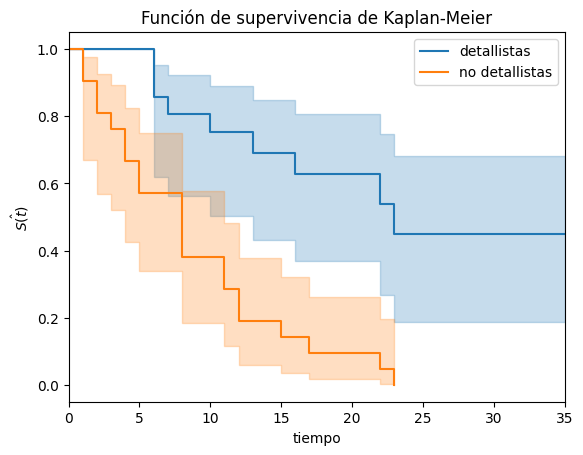

In [24]:
km_deta.plot_survival_function(label = 'detallistas')
km_nodeta.plot_survival_function(label = 'no detallistas')
plt.xlim(0,35)
plt.title('Función de supervivencia de Kaplan-Meier')
plt.xlabel('tiempo')
plt.ylabel('$\hat{S(t)}$')
plt.yticks([0,0.2,0.4,0.6,0.8,1]);

prueba de hipótesis (Log Rank Test)
$H0 : S(1) = S(2)$ funciones de supervivencia iguales
$Ha: S(1) =/= S(2)$ funciones de supervivencia distintas

In [28]:
lrt = logrank_test(detallistas['t'], no_deta['t'], detallistas['estado'], no_deta['estado'])
lrt.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55>

In [27]:
lrt.p_value.round(2)

0.0

Rechazamos H0, las funciones de supervivencia son distintas, las relaciones de los no detallistas terminan más rápido que las de los detallistas.  La mitad de las relaciones de los no detallistas terminan a las 8 semanas, y la mitad de las relaciones de los detallistas terminan a las 23 semanas.

In [31]:
km_deta.median_survival_time_

23.0

In [32]:
km_nodeta.median_survival_time_

8.0